In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
!wget https://www.dropbox.com/s/x3439a7dusvvhd3/out.edit-huwikisource?dl=0 out.edit-huwikisource

--2023-01-08 13:05:12--  https://www.dropbox.com/s/x3439a7dusvvhd3/out.edit-huwikisource?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/x3439a7dusvvhd3/out.edit-huwikisource [following]
--2023-01-08 13:05:12--  https://www.dropbox.com/s/raw/x3439a7dusvvhd3/out.edit-huwikisource
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd4662b36ec1081f1006c93f263.dl.dropboxusercontent.com/cd/0/inline/B0K_oc2jBKWbEh_LuO3xucmMZHgrrRiOhaqRYsZFBLpVLyylndWdahAKDmrnDB981tJs72JD5mOJG7tEayYYkVNpCxhrpe27_5h7DXE41JtpZF1BA7boI6NRLulnPMO146ctSpr_IUt7Gm0Skeid-sy3gbwr5dAVc3EX8diGVeIKTw/file# [following]
--2023-01-08 13:05:13--  https://ucd4662b36ec1081f1006c93f263.dl.dropboxusercontent.com/cd/0/inline/B0K_oc2jBKWbEh_LuO3xucmMZHgrrRiOhaqRYsZFBLpVLyyl

In [2]:
with open('/content/out.edit-huwikisource?dl=0') as f:
    f = f.read()

In [3]:
print(f[:100])

% bip positive
1	1	1	1149411943
2	1	1	1149565895
2	1	1	1149566104
3	1	1	1149689298
4	2	1	1149360374



In [4]:
s = f.split('\n')

In [6]:
s[0]

'% bip positive'

In [7]:
s[1]

'1\t1\t1\t1149411943'

In [11]:
s[-2]

'331\t35748\t1\t1500526365'

In [9]:
len(s)

82238

In [5]:
two_collumns = []
for i in tqdm(s[1:-1]):
    a = i.split()
    #print(a)
    two_collumns.append(tuple(sorted((int(a[0]), int(a[1])))))

100%|██████████| 82236/82236 [00:00<00:00, 246688.30it/s]


In [13]:
s[-2]

'331\t35748\t1\t1500526365'

In [14]:
len(two_collumns)

82236

In [15]:
two_collumns[-1]

(331, 35748)

In [6]:
unique = set(two_collumns)

In [7]:
len(unique)

54607

In [ ]:
two_collumns

In [8]:
data = sorted(unique)

In [ ]:
data

# START


graph

In [41]:
D = nx.DiGraph()
D.add_edges_from(data)

In [42]:
len(D.nodes)

35588

In [43]:
len(D.edges)

54607

In [12]:
import random

def sample_nodes(graph, sample_size):
    # Get a list of all the nodes in the graph
    nodes = list(graph.nodes)
    # Use the sample function to select a random sample of the nodes
    sample = random.sample(nodes, sample_size)
    return sample

In [13]:
Q = sample_nodes(D, 15000)

In [15]:
Z = D.subgraph(Q)

In [ ]:
Z.edges

In [ ]:
#len(nx.shortest_path(D,66).keys())

In [ ]:
#nx.shortest_path(D,1)

La plus grande composante connexe du graph est :

In [49]:
# Trouver la plus grande composante connexe du graph
largest_cc = max(nx.connected_components(D.to_undirected()), key=len)

make a subgraph

In [50]:
W = D.subgraph(largest_cc)

In [51]:
len(W.nodes())

35586

In [52]:
len(W.edges())

54606

relable

In [53]:
mapping = dict(zip(W, range(0, len(W.nodes()))))
N = nx.relabel_nodes(W, mapping)  # nodes are integers 0 through 1707-1

In [54]:
N = N.to_undirected()

make a txt

In [ ]:
N.edges

In [62]:
df = pd.DataFrame()
df['node'] = [i[0] for i in list(N.edges)]
df['edge'] = [i[1] for i in list(N.edges)]

In [63]:
df

,node,edge
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
54601,30730,34268
54602,31069,34265
54603,31806,34273
54604,34271,34811


Combien y a-t-il de sommets et d’aretes dans les donnees filtrees ? com- bien dans les donnees originales ?

sommets = nodes

In [30]:
len(N.nodes())

11658

In [31]:
len(df['node'].unique())

128

aretes = edges

9059

Calculez la densite et le degre moyen du reseau.

For an undirected graph, the density is calculated as 2*m/(n*(n-1)) where m is the number of edges and n is the number of nodes. The average degree is calculated as 2*m/n .

density

In [64]:
n = len(N.nodes())
m = len(N.edges())

In [65]:
n, m

(35586, 54606)

In [66]:
density = 2*m/(n*(n-1))
density

8.624307161034392e-05

average_degree

In [67]:
average_degree = 2*m/n
average_degree

3.0689597032540887

# 2 Distances

Question 5. Calculez la distance moyenne entre deux sommets du reseau moreno.


La distance moyenne entre deux sommets est :

In [37]:
average_shortest_path_length = nx.average_shortest_path_length(N)
average_shortest_path_length

2.8429588883829675

Calculez le diametre du reseau

In [38]:
diameter = nx.diameter(N)
diameter

9

# 3 Distribution des degres

Question 7. Calculez la distribution des degres du reseau moreno et tracez la avec une echelle lin-lin puis avec une echelle log-log.


In [68]:
degree_sequence = [d for n, d in N.degree()]

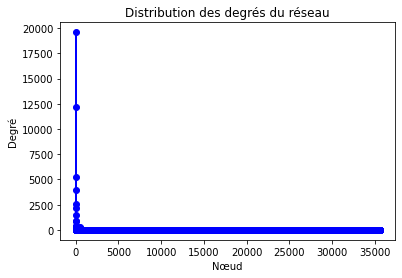

In [69]:
plt.plot(degree_sequence, 'b-', marker='o')
plt.title("Distribution des degrés du réseau")
plt.ylabel("Degré")
plt.xlabel("Nœud")
plt.show()

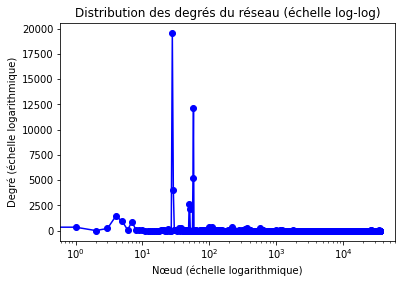

In [70]:
plt.semilogx(degree_sequence, 'b-', marker='o')
plt.title("Distribution des degrés du réseau (échelle log-log)")
plt.ylabel("Degré (échelle logarithmique)")
plt.xlabel("Nœud (échelle logarithmique)")
plt.show()

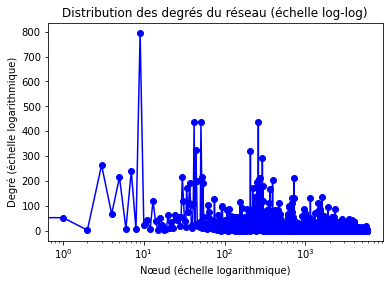

In [ ]:

#
plt.semilogx(degree_sequence, 'b-', marker='o')
plt.title("Distribution des degrés du réseau (échelle log-log)")
plt.ylabel("Degré (échelle logarithmique)")
plt.xlabel("Nœud (échelle logarithmique)")
plt.show()

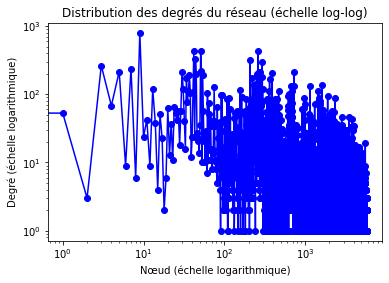

In [ ]:
#
plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Distribution des degrés du réseau (échelle log-log)")
plt.ylabel("Degré (échelle logarithmique)")
plt.xlabel("Nœud (échelle logarithmique)")
plt.show()

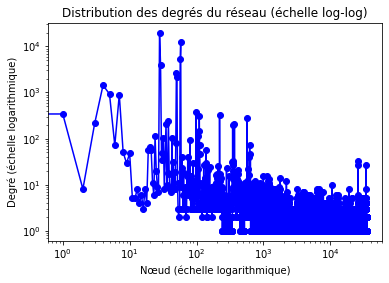

In [71]:
plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Distribution des degrés du réseau (échelle log-log)")
plt.ylabel("Degré (échelle logarithmique)")
plt.xlabel("Nœud (échelle logarithmique)")
plt.show()

# 4 Densite locale

Calculez le nombre de triangles, le coefficient de clustering global et le coefficient de clustering local du reseau

In [ ]:
# Calcul du nombre de triangles
triangles = sum(nx.triangles(N).values()) / 3
print("Nombre de triangles:", triangles)

# Calcul du coefficient de clustering global
clustering_coeff = nx.transitivity(N)
print("Coefficient de clustering global:", clustering_coeff)

# Calcul du coefficient de clustering local pour chaque noeud
local_clustering = nx.clustering(N)
print("Coefficients de clustering locaux:", local_clustering)

Nombre de triangles: 33493.0
Coefficient de clustering global: 0.0592384412258376
Coefficients de clustering locaux: {0: 0.13804713804713806, 1: 0.11248185776487664, 2: 1.0, 3: 0.050005761032377, 4: 0.10052677787532924, 5: 0.04359921756139969, 6: 0.4722222222222222, 7: 0.027671319573854648, 8: 0.26666666666666666, 9: 0.0034187221773363118, 10: 0.14492753623188406, 11: 0.10220673635307782, 12: 0.19444444444444445, 13: 0.08221288515406162, 14: 0.11806543385490754, 15: 0.16666666666666666, 16: 0.05568627450980392, 17: 0.08695652173913043, 18: 0, 19: 0.06666666666666667, 20: 0.047593865679534636, 21: 0.1282051282051282, 22: 0.2927927927927928, 23: 0.18181818181818182, 24: 0.10480769230769231, 25: 0.19158200290275762, 26: 0.07665505226480836, 27: 0.040726817042606514, 28: 0.16339869281045752, 29: 0.05263157894736842, 30: 0.04478897502153316, 31: 0.09132231404958678, 32: 0.12682926829268293, 33: 0.31666666666666665, 34: 0.07093223254213966, 35: 0.09578947368421052, 36: 0.09156429156429156, 3

Tracez la distribution du coefficient de clustering local de chaque noeud.

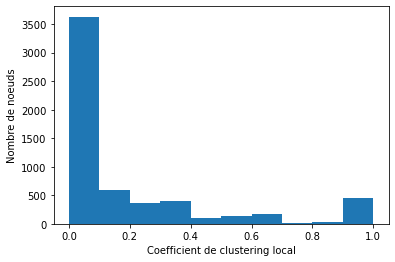

In [ ]:
# Tracé de la distribution des coefficients de clustering locaux
plt.hist(local_clustering.values())
plt.xlabel('Coefficient de clustering local')
plt.ylabel('Nombre de noeuds')
plt.show()

Tracez plutot la distribution cumulative inverse

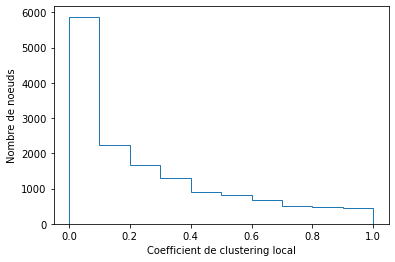

In [ ]:
# Tracé de la distribution cumulative inverse des coefficients de clustering locaux
plt.hist(local_clustering.values(), cumulative=-1, histtype='step')
plt.xlabel('Coefficient de clustering local')
plt.ylabel('Nombre de noeuds')
plt.show()

# 5 Comparaison aux modeles classiques

Suivez la meme methode de traitement des donnees et faites les memes statistiques que pour le reseau original.

In [24]:
def analyse(graph):
    # Trouver la plus grande composante connexe du graph
    largest_cc = max(nx.connected_components(graph.to_undirected()), key=len)
    W = graph.subgraph(largest_cc)
    mapping = dict(zip(W, range(0, len(W.nodes()))))
    N = nx.relabel_nodes(W, mapping)
    N = N.to_undirected()

    print(f'Les donnees filtrees: {len(N.nodes)} sommets, {len(N.edges)} aretes')
    print(f'Les donnees originales: {len(graph.nodes)} sommets, {len(graph.edges)} aretes')
    
    n = len(N.nodes)
    m = len(N.edges)
    density = 2*m/(n*(n-1))
    average_degree = 2*m/n
    print(f'Density: {density}')
    print(f'Average degree: {average_degree}')
    
    print()
    print('** Distribution des degres **')
    degree_sequence = [d for n, d in N.degree()]
    
    plt.plot(degree_sequence, 'b-', marker='o')
    plt.title("Distribution des degrés du réseau")
    plt.ylabel("Degré")
    plt.xlabel("Nœud")
    plt.show()
    
    plt.loglog(degree_sequence, 'b-', marker='o')
    plt.title("Distribution des degrés du réseau (échelle log-log)")
    plt.ylabel("Degré (échelle logarithmique)")
    plt.xlabel("Nœud (échelle logarithmique)")
    plt.show()
    
    print()
    print('** Densite locale **')
    # Calcul du nombre de triangles
    triangles = sum(nx.triangles(N).values()) / 3
    print("Nombre de triangles:", triangles)

    # Calcul du coefficient de clustering global
    clustering_coeff = nx.transitivity(N)
    print("Coefficient de clustering global:", clustering_coeff)

    # Calcul du coefficient de clustering local pour chaque noeud
    local_clustering = nx.clustering(N)
    #print("Coefficients de clustering locaux:", local_clustering)

    # Tracé de la distribution des coefficients de clustering locaux
    plt.hist(local_clustering.values())
    plt.xlabel('Coefficient de clustering local')
    plt.ylabel('Nombre de noeuds')
    plt.show()
    
    # Tracé de la distribution cumulative inverse des coefficients de clustering locaux
    plt.hist(local_clustering.values(), cumulative=-1, histtype='step')
    plt.xlabel('Coefficient de clustering local')
    plt.ylabel('Nombre de noeuds')
    plt.show()
    
    print()
    print('** Distances **')
    average_shortest_path_length = nx.average_shortest_path_length(N)
    print(f'La distance moyenne entre deux sommets est: {average_shortest_path_length}')
    diameter = nx.diameter(N)
    print(f'Le diameter du reseau: {diameter}')

Les donnees filtrees: 35586 sommets, 54606 aretes
Les donnees originales: 35588 sommets, 54607 aretes
Density: 8.624307161034392e-05
Average degree: 3.0689597032540887

** Distribution des degres **


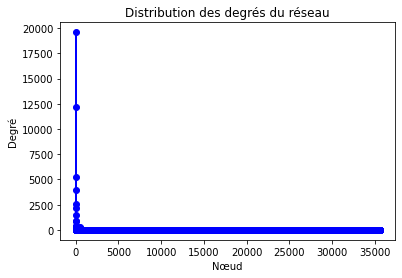

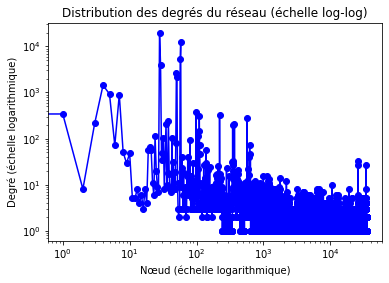


** Densite locale **
Nombre de triangles: 13076.0
Coefficient de clustering global: 0.00013268871988729997


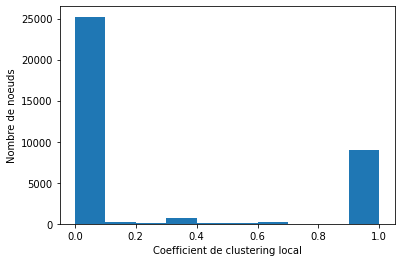

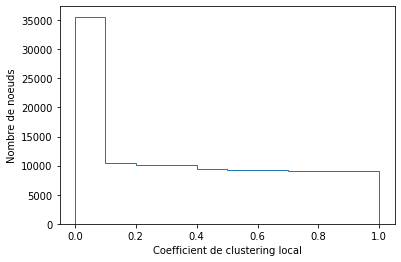


** Distances **
La distance moyenne entre deux sommets est: 3.064783934580099
Le diameter du reseau: 6


In [25]:
analyse(D)